In [1]:
# importing library
import pandas as pd
import numpy as np
import requests as req
import tweepy
import json
import matplotlib.pyplot as plt

% matplotlib inline

## Gather

In [2]:
# Read in csv file
twitter_achr = pd.read_csv('twitter-archive-enhanced.csv')
twitter_achr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_achr.duplicated().sum()

0

In [4]:
# Read in tsv file
img = pd.read_csv('image-predictions.tsv', sep='\t')
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Download tsv by requests
response = req.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

# save to a file
with open("image-predictions.tsv", mode="wb") as file:
    file.write(response.content)

## Twiiter API

In [6]:
## Keys is deleted
consumer_key = "..."
consumer_secret = "..."
access_token = "..."
access_secret = "..."

#Variables 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Wait on rate all True: 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify =True)

In [7]:
# Twitter may have deleted the twitter_id-- creating 2 different lists 
yes_tweets = []
no_tweets = []

def seperate_tweet(tweet_id):
    try: 
        yes_tweets.append(api.get_status(tweet_id))   #Seperate tweets with no tweet_id and tweets without tweet_id 
    except Exception as e: 
        no_tweets.append(tweet_id)

[seperate_tweet(twt_id) for twt_id in twitter_achr['tweet_id'].tolist()]

Rate limit reached. Sleeping for: 737
Rate limit reached. Sleeping for: 740


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [8]:
# Checking no tweet
no_tweets

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [9]:
# Checking tweets
len(yes_tweets)

2331

In [10]:
# Loading json file and load it into a dictionariy
# Then write it to a file
json_data = []
for json_twt in yes_tweets:
    json_data.append(json_twt._json)
with open('json_tweets.txt', 'w') as file:
    file.write(json.dumps(json_data, indent=4))
    
# Create data frame 
df_list = []
header = ['tweet_id', 'favorite_count', 'retweet_count']
with open('json_tweets.txt', encoding='utf-8') as json_file:
    data = json.load(json_file)
    for d in data:
        tweetID = d['id']
        # print(tweetID)
        fav_count = d['favorite_count']
        retwt_count = d['retweet_count']
        df_list.append({'tweet_id': str(tweetID),'favorite_count': int(fav_count),'retweet_count': int(retwt_count),})

In [11]:
json_df = pd.DataFrame(df_list, columns = header)

In [12]:
json_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36110,7690
1,892177421306343426,31140,5689
2,891815181378084864,23457,3772
3,891689557279858688,39396,7856
4,891327558926688256,37621,8462


## Assessing

### 1) twitter_archive

**Quality**
- Retweeted is not needed in the data frame, most of them or NaNs
- There are columns related to rewteet that is also not needed and need to be dropped
- tweet id should be string instead of int
- Time stamp should be Pandas datetime object
- Articles ('a', 'an', 'the' 'such') in the column names.
- Missing data is displayed as None instead of NaN in doggo, floofer, pupper, puppo
- Incorrect values in rating numerators

**Tidiness**

- Infoamtion about observational unit (tweet-id) is spread across different datasets. Therefore, these datasets should be merged as they share the same part of observational unit
- Dog stage should be a single column instead of 4. Merging doggo, floofer, pupper and puppo

In [13]:
twitter_achr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_achr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2) image

**Quality**
- tweet id should be string instead of int
- Columns name is confusing
- There is no duplicated in the DataFrame
- Dog breed name sometimes upper case and sometimes lower case --> Switch everything to lower case to make it easier for observations

**Tidiness**
- Join 2 table to get the final product


In [15]:
img.duplicated().sum()

0

In [16]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Data Cleaning

In [54]:
# Making copies
ta_copy = twitter_achr.copy()
img_copy = img.copy()

In [55]:
## 1. Define: Dropping retweets data

# Drop row, removing retweet row
ta_copy = ta_copy[ta_copy['retweeted_status_id'].isnull()]
ta_copy = ta_copy[ta_copy['retweeted_status_user_id'].isnull()]
ta_copy = ta_copy[ta_copy['retweeted_status_timestamp'].isnull()]

# Drop column
ta_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'],axis=1, inplace=True)

## Test
ta_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [56]:
## 2-3. Define: convert tweet id to string for both df
ta_copy['tweet_id'] = ta_copy['tweet_id'].apply(str)

img_copy['tweet_id'] = img_copy['tweet_id'].apply(str)


## Test 
print(ta_copy.info())
print(img_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(10)
memory usage: 220.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 n

In [57]:
## 4. Define: convert None to "" and merge columns

ta_copy.doggo = ta_copy.doggo.replace('None','')
ta_copy.floofer = ta_copy.floofer.replace('None','')
ta_copy.pupper = ta_copy.pupper.replace('None','')
ta_copy.puppo = ta_copy.puppo.replace('None','')

ta_copy.doggo = ta_copy.doggo.replace(np.nan,'')
ta_copy.floofer = ta_copy.floofer.replace(np.nan,'')
ta_copy.pupper = ta_copy.pupper.replace(np.nan,'')
ta_copy.puppo = ta_copy.puppo.replace(np.nan,'')

#Merge all four columns to one column 'dog'. 
ta_copy['stage'] = ta_copy.doggo + ta_copy.floofer + ta_copy.pupper + ta_copy.puppo
ta_copy.loc[ta_copy.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
ta_copy.loc[ta_copy.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
ta_copy.loc[ta_copy.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

## Test
ta_copy.stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

In [58]:
## 5. Define: Fix incorrect value in denominator

ratings = ta_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ta_copy.rating_numerator = ratings

ta_copy['rating_numerator'].value_counts()

12       500
10       442
11       426
13       307
9        156
8         98
7         53
14        43
5         34
6         32
3         19
4         17
2          9
1          8
420        2
0          2
121        1
11.27      1
88         1
24         1
17         1
99         1
9.5        1
007        1
50         1
204        1
1776       1
45         1
15         1
44         1
84         1
182        1
666        1
80         1
11.26      1
144        1
60         1
20         1
143        1
165        1
13.5       1
9.75       1
960        1
Name: rating_numerator, dtype: int64

In [59]:
## 6. Define: Fixed dog names
ta_copy['name'].replace('None', np.nan, inplace=True)
ta_copy['name'].replace('a', np.nan, inplace=True)
ta_copy['name'].replace('an', np.nan, inplace=True)
ta_copy['name'].replace('quite', np.nan, inplace=True)
ta_copy['name'].replace('the', np.nan, inplace=True)
ta_copy['name'].replace('such', np.nan, inplace=True)

## Test
ta_copy['name'].value_counts()

Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Sadie          8
Lola           8
Winston        8
Daisy          7
Toby           7
Bailey         6
Koda           6
Bella          6
Oscar          6
Bo             6
Stanley        6
Jax            6
Rusty          5
Milo           5
Dave           5
Leo            5
Louis          5
Chester        5
Scout          5
Buddy          5
Bentley        5
Jeffrey        4
Jerry          4
George         4
              ..
Newt           1
Lassie         1
Lupe           1
Zooey          1
Nico           1
Noosh          1
Kanu           1
Leela          1
Chase          1
Robin          1
Tito           1
Craig          1
Bodie          1
Hercules       1
Brooks         1
Marty          1
Hero           1
Karll          1
officially     1
Eleanor        1
Dook           1
Aiden          1
Raphael        1
Mary           1
Tassy          1
Willow         1
Bluebert       1
Patch         

In [60]:
## 7. Convert timestamp do datetime type
ta_copy['timestamp'] = pd.to_datetime(ta_copy['timestamp'], infer_datetime_format=True)

## Test
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null object
rating_denominator    2175 non-null int64
name                  1422 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 237.9+ KB


In [61]:
## 8. Define: extract html tag out of source

ta_copy['source'] = ta_copy['source'].str.extract('>(.*)<', expand=True)

## Test
ta_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


In [62]:
## 9. Define: Capitalize all dogs name
def fix_name(name):
    return name.lower()

img_copy['p1'] = img_copy['p1'].apply(fix_name)
img_copy['p2'] = img_copy['p2'].apply(fix_name)
img_copy['p3'] = img_copy['p3'].apply(fix_name)

## Test
img_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [63]:
## 10. Remove all False in p1 p2 p3 _ dog

img_copy = img_copy[(img_copy['p1_dog']==True) & (img_copy['p2_dog']==True) & (img_copy['p3_dog']==True)]

## Test
print(img_copy['p1_dog'].value_counts())
print(img_copy['p2_dog'].value_counts())
print(img_copy['p3_dog'].value_counts())

True    1243
Name: p1_dog, dtype: int64
True    1243
Name: p2_dog, dtype: int64
True    1243
Name: p3_dog, dtype: int64


In [64]:
## Combine 2 df
final_df = pd.merge(ta_copy, img_copy, on=('tweet_id'))
final_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
3,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,,,...,2,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
4,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,...,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True


## Storing and acting

In [65]:
# Save the DataFrame to a file called 'twitter_archive_master.csv'

final_df.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

**3 insights**

1) Cooper was the most common dog name with 9 appearances in the dataset, followed by Charlie with 8 and Oliver with 7

2) Labrador_retriever was the most tweeted breed with 138 appearance verses Golden Retriever with 126 appearances

3) Twitters users tweet most in December with 241 appearance follow by November and January

In [68]:
final_df['name'].value_counts()

Cooper            9
Charlie           8
Oliver            7
Sadie             6
Koda              6
Toby              5
Tucker            5
Leo               5
Lucy              5
Winston           5
Bo                5
Reggie            4
Oscar             4
Dave              4
Daisy             4
Stanley           4
Scooter           4
Bear              4
Maggie            4
Finn              4
Sophie            4
Larry             4
Gus               4
Penny             3
Duke              3
Lola              3
Olive             3
Cassie            3
Bentley           3
Scout             3
                 ..
Lenny             1
Jazzy             1
Clarq             1
Hubertson         1
Pumpkin           1
Tyrone            1
Rose              1
Nigel             1
Albert            1
Dido              1
Michelangelope    1
Chloe             1
Freddery          1
Roscoe            1
Scruffers         1
Kenneth           1
Terrance          1
Kirby             1
Gilbert           1


In [69]:
final_df['p1'].value_counts()

golden_retriever                  119
pembroke                           77
labrador_retriever                 75
chihuahua                          50
pug                                39
pomeranian                         28
malamute                           26
toy_poodle                         26
chow                               26
samoyed                            25
cocker_spaniel                     23
miniature_pinscher                 20
french_bulldog                     20
siberian_husky                     17
beagle                             17
german_shepherd                    17
staffordshire_bullterrier          16
chesapeake_bay_retriever           15
shetland_sheepdog                  15
rottweiler                         15
shih-tzu                           15
maltese_dog                        15
cardigan                           14
eskimo_dog                         14
great_pyrenees                     13
italian_greyhound                  13
american_sta

In [70]:
final_df['p2'].value_counts()

labrador_retriever                70
cardigan                          63
golden_retriever                  54
chihuahua                         32
french_bulldog                    30
chesapeake_bay_retriever          30
siberian_husky                    30
beagle                            27
pomeranian                        27
collie                            26
miniature_poodle                  26
toy_poodle                        25
cocker_spaniel                    25
eskimo_dog                        23
kuvasz                            22
pembroke                          18
malinois                          18
samoyed                           17
miniature_pinscher                17
american_staffordshire_terrier    17
pekinese                          16
italian_greyhound                 16
toy_terrier                       15
boston_bull                       15
chow                              15
staffordshire_bullterrier         14
irish_terrier                     13
g

In [71]:
final_df['p3'].value_counts()

labrador_retriever                62
chihuahua                         48
golden_retriever                  33
eskimo_dog                        31
kelpie                            28
staffordshire_bullterrier         27
pekinese                          26
kuvasz                            25
cocker_spaniel                    25
beagle                            24
great_pyrenees                    23
chow                              22
chesapeake_bay_retriever          21
french_bulldog                    21
toy_poodle                        21
pomeranian                        21
american_staffordshire_terrier    20
malamute                          20
bull_mastiff                      17
basenji                           17
pembroke                          16
cardigan                          16
toy_terrier                       16
boxer                             15
boston_bull                       15
lakeland_terrier                  14
saluki                            14
s

In [72]:
final_df['month'] = final_df['timestamp'].dt.month
final_df['month'].value_counts()

12    237
11    199
1     150
2     109
3     107
7      84
6      77
5      60
4      59
9      43
10     41
8      37
Name: month, dtype: int64

Text(0.5,1,'Number of tweets per month')

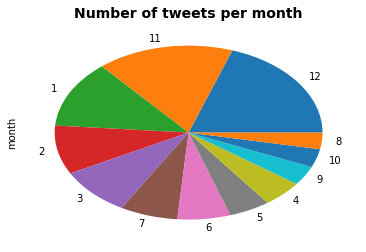

In [73]:
final_df['month'] = final_df['timestamp'].dt.month
final_df['month'].value_counts().plot(kind='pie')
plt.title("Number of tweets per month", fontsize=14, fontweight="bold")

Text(0,0.5,'Frequency')

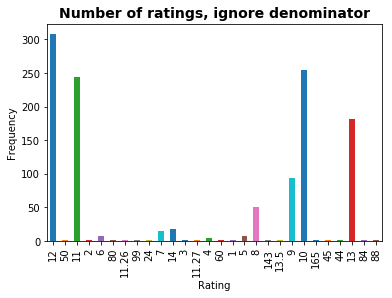

In [74]:
final_df['rating_numerator'].value_counts(sort=False).plot(kind='bar')
plt.title("Number of ratings, ignore denominator", fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')

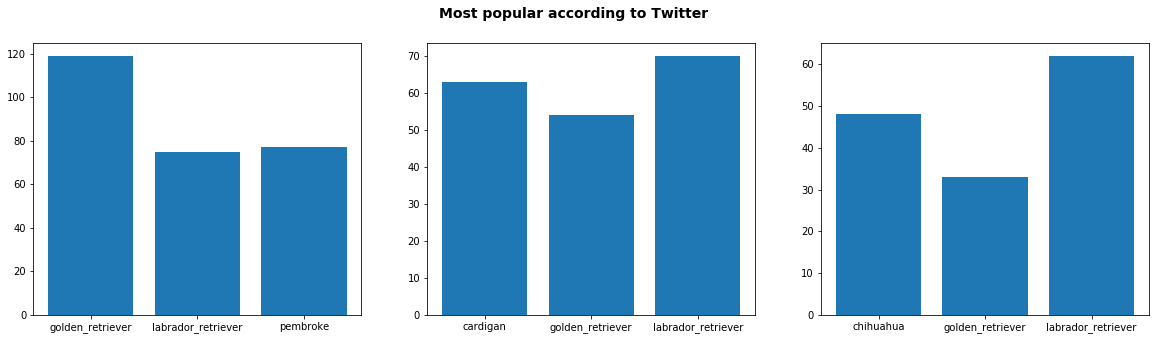

In [114]:
## Most popular dog breed
def get_kv(d):
    key = d.keys()
    val = []
    for k in key:
        val.append(d[k])
    return list(key), val

k1, v1 = get_kv(dict(final_df['p1'].value_counts()))
k2, v2 = get_kv(dict(final_df['p2'].value_counts()))
k3, v3 = get_kv(dict(final_df['p3'].value_counts()))

fig= plt.figure(1, figsize=(20,5))
plt.subplot(131)
plt.bar(k1[0:3], height=v1[0:3])
plt.subplot(132)
plt.bar(k2[0:3], height=v2[0:3])
plt.subplot(133)
plt.bar(k3[0:3], height=v3[0:3])

plt.suptitle("Most popular according to Twitter", fontsize=14, fontweight='bold')
plt.show()
